## 1. Cost Function

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$$ 

In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

## 2. Gradient Descent With Multiple Variables

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for} j = 0,...,n-1 \newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

$n$ is the number of features;

parameters $w_j$,  $b$, are updated simultaneously

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$

$m$ is the number of training examples in the data set

$f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

## 3. Code

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 2个特征
$$f(x) = w_1x_1 + w_2x_2 + b$$

#### 生成数据

In [38]:
def generate_data(num_samples = 100, w1 = 2, w2 = 3, b = 5, noise_scale = 1.0):
    np.random.seed(76)
    x = np.random.rand(num_samples, 2) * 10
    noise = np.random.normal(scale = noise_scale, size = num_samples)
    y = w1 * x[:, 0] + w2 * x[:, 1] + b + noise
    return x, y

In [39]:
X, y = generate_data(num_samples = 100, w1 = 2, w2 = 3, b = 5, noise_scale = 1.0)

In [40]:
print(f"\n First 3 rows of X = \n {X[:3]}...\n\n First 3 values of y = {y[:3]}...")


 First 3 rows of X = 
 [[3.108298   8.18987221]
 [3.34752625 1.93713519]
 [1.10313325 9.62310087]]...

 First 3 values of y = [35.1673965  18.37644252 36.44424785]...


In [41]:
def plot_data(x, y):
    fig = plt.figure(figsize = (15, 7))

    ax1 = fig.add_subplot(131, projection = "3d")
    ax1.scatter(x[:, 0], x[:, 1], y, c = "r", marker = "o", label = "Data points")
    ax1.set_xlabel("X1")
    ax1.set_ylabel("X2")
    ax1.set_zlabel("y", labelpad = -30)
    ax1.set_title("3D Data Points")
    ax1.legend()

    ax2 = fig.add_subplot(132)
    ax2.scatter(x[:, 0], y, c = "b", marker = "o", label = "X1 vs y")
    ax2.set_xlabel('X1')
    ax2.set_ylabel('y')
    ax2.set_title('X1 vs y')
    ax2.legend()

    ax3 = fig.add_subplot(133)
    ax3.scatter(x[:, 1], y, c = "g", marker = "o", label = "X2 vs y")
    ax3.set_xlabel('X2')
    ax3.set_title('X2 vs y')
    ax3.legend()

    plt.tight_layout()
    plt.show()

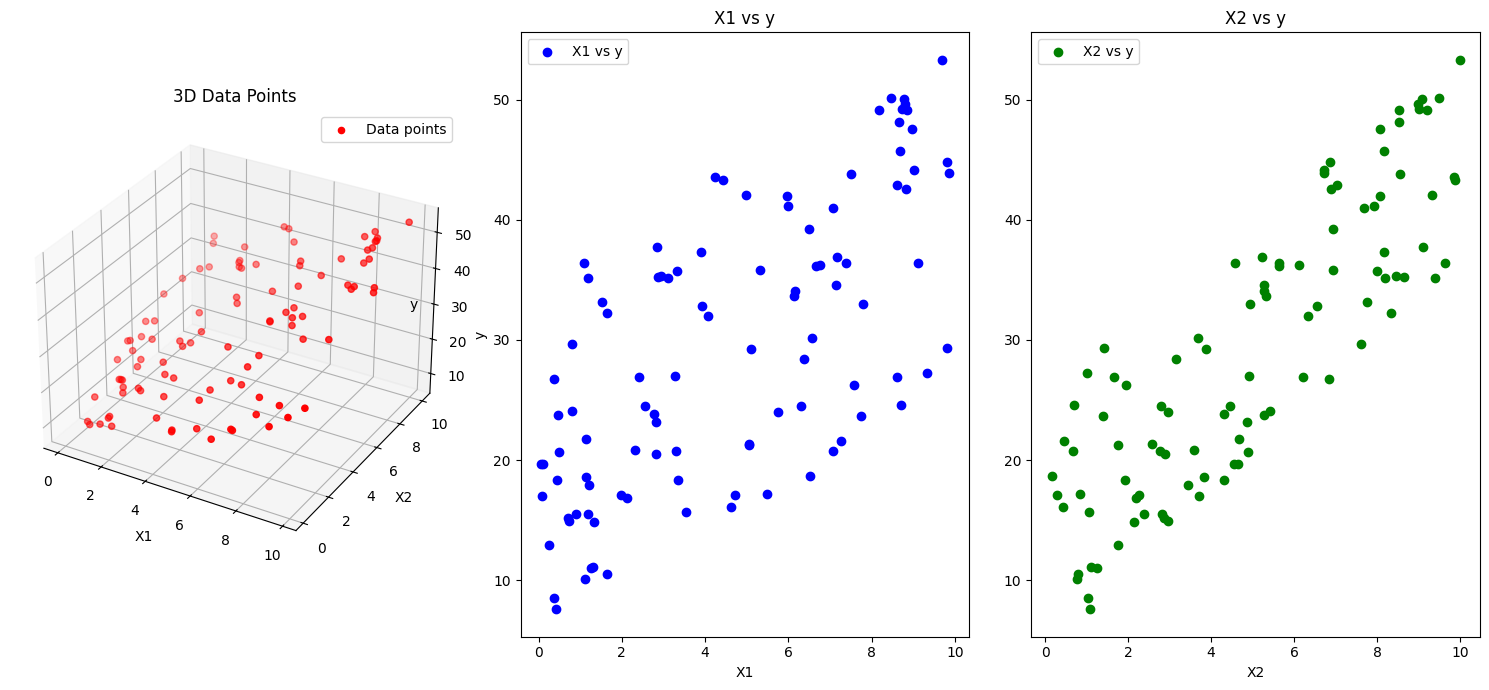

In [42]:
plot_data(X, y)

#### 实现：梯度下降 + 多元线性回归拟合

In [43]:
def predict(x, w, b):
    return np.dot(x, w) + b

In [44]:
def compute_cost(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    cost = (1 / (2 * m) * np.sum((predictions - y) ** 2))
    return cost

In [45]:
def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    error = predictions - y
    dw = (1 / m) * np.dot(x.T, error)
    db = (1 / m) * np.sum(error)
    return dw, db

In [46]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    w = w_init.copy()
    b = b_init
    cost_history = []
    w_history = []
    b_history = []

    for i in range(num_iters):
        dw, db = compute_gradient(x, y, w, b)

        w -= alpha * dw
        b -= alpha * db

        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        w_history.append(w.copy())
        b_history.append(b)

    return w, b, cost_history, w_history, b_history

In [47]:
w_init = np.zeros(2)
b_init = 0
alpha = 0.01
num_iters = 1000

In [48]:
w_final, b_final, cost_history, w_history, b_history = gradient_descent(
    X, y, w_init, b_init, alpha, num_iters
)
print(f"Final parameters: w = {np.round(w_final, 2)}, b = {b_final:.2f}")


Final parameters: w = [2.01 3.02], b = 4.80


##### 损失函数图

In [49]:
def plot_cost_history(cost_history):
    plt.plot(cost_history, color = "r")
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function Over Iterations')
    plt.show()


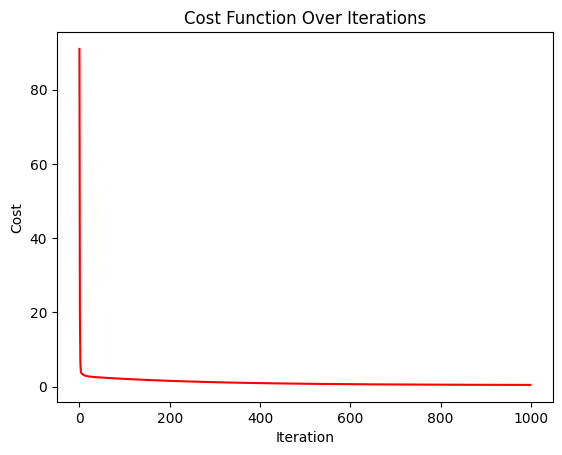

In [50]:
plot_cost_history(cost_history)


##### 参数图

In [51]:
def plot_parameters(w_history, b_history):
    plt.figure(figsize = (12, 6))

    plt.subplot(1, 2, 1)
    w_history = np.array(w_history)
    plt.plot(w_history[:, 0], linewidth = 2, c = "r", label = "w1")
    plt.plot(w_history[:, 1], linewidth = 2, c = "b", label = "w2")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title("Weights (w1 and w1) Over Iterations")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(b_history, linewidth = 2, c = "g", label = "b")
    plt.xlabel("Iteration")
    plt.title("Bias (b) Over Iterations")
    plt.legend()

    plt.tight_layout()
    plt.show()


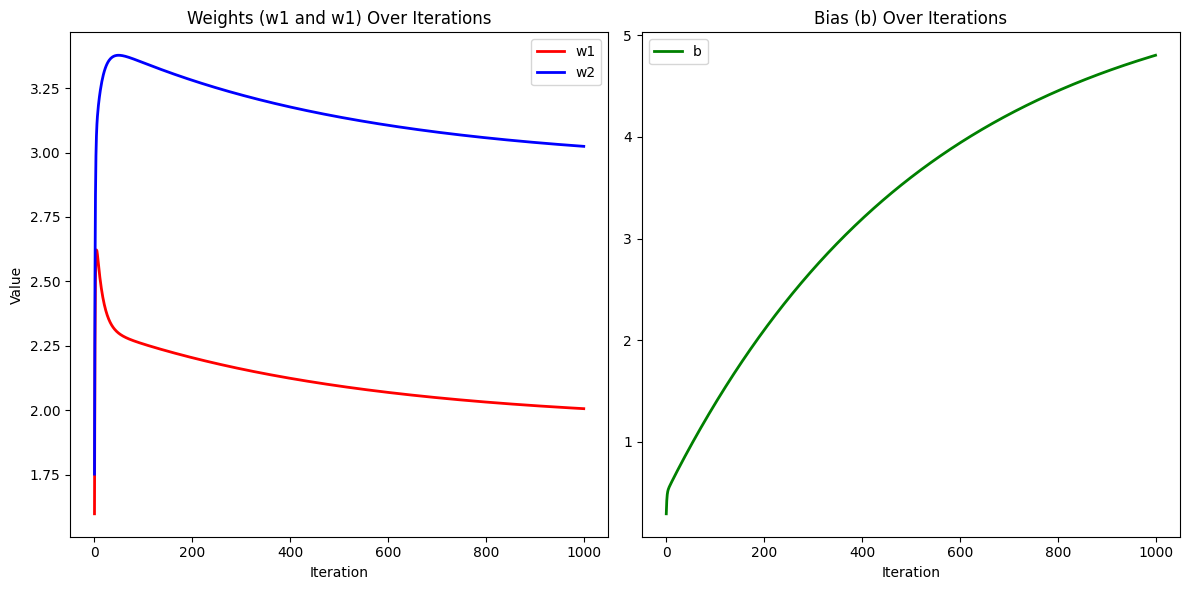

In [52]:
plot_parameters(w_history, b_history)

##### 拟合图

In [53]:
def plot_fit(x, y, w, b):
    fig = plt.figure(figsize = (10, 7))
    ax = fig.add_subplot(111, projection = "3d")
    ax.scatter(x[:, 0], x[:, 1], y, c = "r", marker = "o", label = "Data points")

    x1_range = np.linspace(min(x[:, 0]), max(x[:, 0]), 20)
    x2_range = np.linspace(min(x[:, 1]), max(x[:, 1]), 20)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    y_grid = w[0] * x1_grid + w[1] * x2_grid + b

    ax.plot_surface(x1_grid, x2_grid, y_grid, alpha = 0.5, cmap = "viridis", label = "Fitted plane")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y', labelpad = -30)
    ax.set_title('Fitted Model')
    plt.legend()
    plt.show()
    

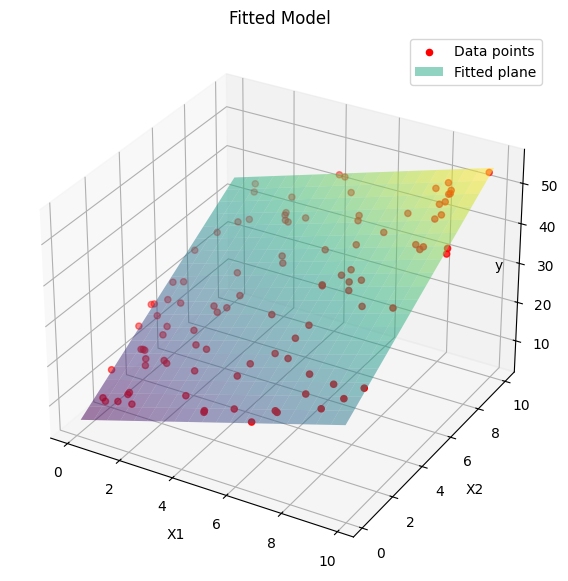

In [54]:
plot_fit(X, y, w_final, b_final)
